## Interstellar.

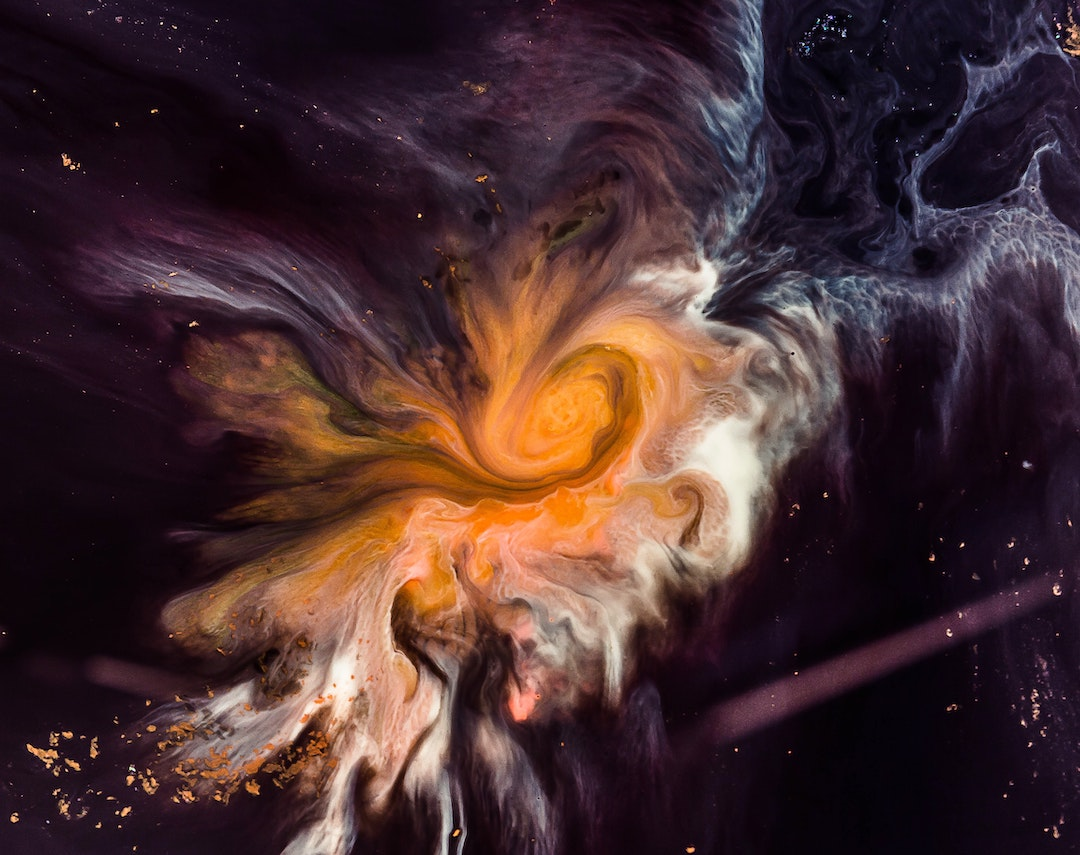

# **Problem Statement**

**Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.**

**The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.**

**While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!**

## Objectives/Goal

 **The goal of this project is to To help rescue crews and retrieve the lost passengers, the challenge is to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.**

**Help save them and change history! cos people's lives are on the line**

## Problem type
**The project is a classification task**

## Data Source

Find attached the link to the data:
[data-source](https://www.kaggle.com/competitions/spaceship-titanic)

## Importing important libraries

In [4294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,accuracy_score,confusion_matrix

## Importing the train data set and test data set via the file paths and getting the first five rows in that regard.

In [4295]:
train = pd.read_csv(r'C:\Users\MY PC\Documents\Data Frame\spaceship-titanic\train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4296]:
test = pd.read_csv(r'C:\Users\MY PC\Documents\Data Frame\spaceship-titanic\test.csv')
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


## Getting to know some information about both the train and the test dataset. This shows the data types and the number of null and non-null entries un each columns.

In [4297]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4298]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## Displaying the sum of empty entries in each columns, for both the test and the train dataset.
## Below, it can be seen that only the passenger ID and Transported columns are empty on the train dataset. The passenger ID is the only column empty on the test dataset.

In [4299]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4300]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## The cells below shows the descriptive statistics of each numerical columns in both the test and the train dataset. The count, mean, standard deviation, min and max and the percentiles are displayed.

In [4301]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4302]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


## The list of columns in each dataset

In [4303]:
train.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name',
 'Transported']

In [4304]:
test.columns.tolist()

['PassengerId',
 'HomePlanet',
 'CryoSleep',
 'Cabin',
 'Destination',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Name']

## Getting the columns that contains categorical data types on both the test and train dataset. 

In [4305]:
train.select_dtypes(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,Maham Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,Juanna Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,Altark Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,False,Solam Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,False,Willy Santantines
...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,True,Gravior Noxnuther
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,False,Kurta Mondalley
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,False,Fayey Connon
8691,9280_01,Europa,False,E/608/S,55 Cancri e,False,Celeon Hontichre


In [4306]:
train.select_dtypes(include='object').isnull().sum()

PassengerId      0
HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
dtype: int64

## Getting columns that contain numerical dataset in both dataset

In [4307]:
train_numeric= train.select_dtypes(include=np.number)
train_numeric

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0
8689,18.0,0.0,0.0,0.0,0.0,0.0
8690,26.0,0.0,0.0,1872.0,1.0,0.0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0


In [4308]:
train_numeric.isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [4309]:
test.select_dtypes(include='object')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,False,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,False,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,False,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,False,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,False,Brence Harperez
...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,False,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,False,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,False,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,False,Kitakan Conale


In [4310]:
test.select_dtypes(include='object').isnull().sum()

PassengerId      0
HomePlanet      87
CryoSleep       93
Cabin          100
Destination     92
VIP             93
Name            94
dtype: int64

In [4311]:
test_numeric= test.select_dtypes(include=np.number)
test_numeric

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,27.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0
4,20.0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...
4272,34.0,0.0,0.0,0.0,0.0,0.0
4273,42.0,0.0,847.0,17.0,10.0,144.0
4274,NaN,0.0,0.0,0.0,0.0,0.0
4275,NaN,0.0,2680.0,0.0,0.0,523.0


In [4312]:
test_numeric.isnull().sum()

Age              91
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

## Imputation of empty columns of the numerical dataset by the mean of each columns and inplacing them to make sure the modication takes place.

In [4313]:
train['Age'].fillna(train['Age'].mean(),inplace=True)

In [4314]:
test['Age'].fillna(test['Age'].mean(),inplace=True)

In [4315]:
train['RoomService'].fillna(train['RoomService'].mean(),inplace=True)

In [4316]:
test['RoomService'].fillna(test['RoomService'].mean(),inplace=True)

In [4317]:
train['FoodCourt'].fillna(train['FoodCourt'].mean(),inplace=True)

In [4318]:
test['FoodCourt'].fillna(test['FoodCourt'].mean(),inplace=True)

In [4319]:
train['ShoppingMall'].fillna(train['ShoppingMall'].mean(),inplace=True)

In [4320]:
test['ShoppingMall'].fillna(test['ShoppingMall'].mean(),inplace=True)

In [4321]:
train['Spa'].fillna(train['Spa'].mean(),inplace=True)

In [4322]:
test['Spa'].fillna(test['Spa'].mean(),inplace=True)

In [4323]:
train['VRDeck'].fillna(train['VRDeck'].mean(),inplace=True)

In [4324]:
test['VRDeck'].fillna(test['VRDeck'].mean(),inplace=True)

## The home planet of each passenger shows the planet on which they reside before travelling. People living on planet Earth are many than people living on other planet. 54.19% of the whole travellers is from planet Earth. This can be seen below.

In [4325]:
train['HomePlanet'].value_counts(normalize=True)*100

Earth     54.192181
Europa    25.094206
Mars      20.713613
Name: HomePlanet, dtype: float64

In [4326]:
train['HomePlanet'].value_counts() #In real counts, 4,602 are from planet Earth. 
                                   #Out of all solar systems, the Earth is more populated.


Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

## The chart below justifies the claim above. As we can see, the bar representing Earth is the tallest.

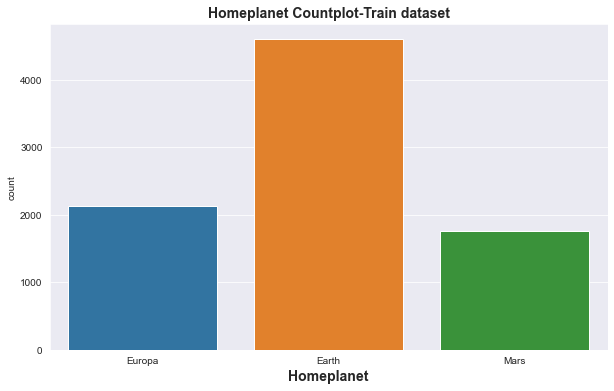

In [4327]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['HomePlanet']);
plt.xlabel('Homeplanet',fontweight='bold',fontsize=14)
plt.title('Homeplanet Countplot-Train dataset',fontsize=14,fontweight='bold');

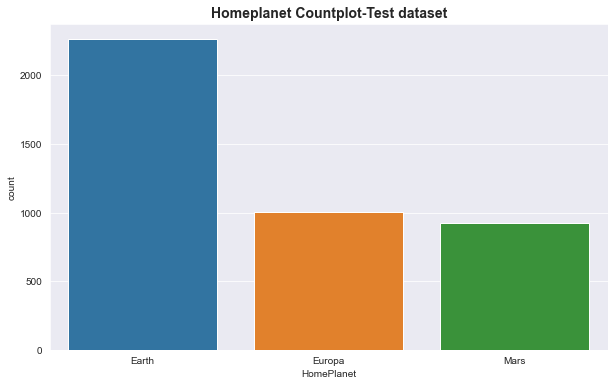

In [4328]:
plt.figure(figsize=(10,6)) 
sns.countplot(x=test['HomePlanet']);
plt.title('Homeplanet Countplot-Test dataset',fontsize=14,fontweight='bold');

## On the test dataset too, people from Earth are more than people from other planets

In [4329]:
test['HomePlanet'].value_counts()

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

## Destination is the solar system where each traveller is debarking to.TRAPPIST -1e is where more people intend to debark to.

In [4330]:
train['Destination'].value_counts(normalize=True)*100 # 69.4% of the people intend to debark to TRAPPIST-1e

TRAPPIST-1e      69.498296
55 Cancri e      21.149101
PSO J318.5-22     9.352603
Name: Destination, dtype: float64

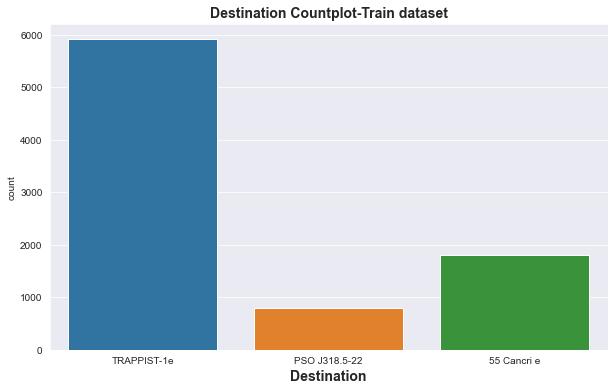

In [4331]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['Destination']);
plt.xlabel('Destination',fontweight='bold',fontsize=14)
plt.title('Destination Countplot-Train dataset',fontsize=14,fontweight='bold');

In [4332]:
test['Destination'].value_counts()

TRAPPIST-1e      2956
55 Cancri e       841
PSO J318.5-22     388
Name: Destination, dtype: int64

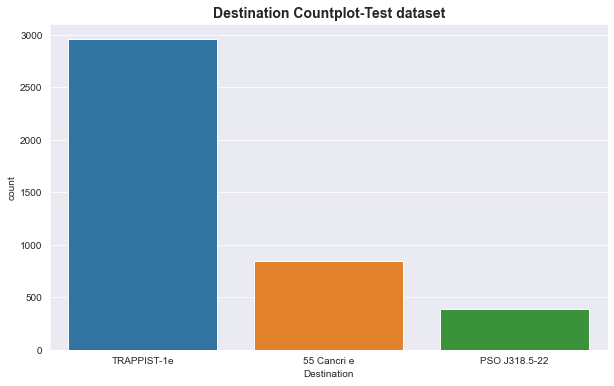

In [4333]:
plt.figure(figsize=(10,6))
sns.countplot(x=test['Destination']);
plt.title('Destination Countplot-Test dataset',fontsize=14,fontweight='bold');

## The chart below shows the distribution of people's age on board.  Majority of the people's. People in the age range of 17-35 appears to be frequent. At the far end to the left of the chart, Children aged 0-2 appears frequently before the curve dropped.

<Figure size 1440x432 with 0 Axes>

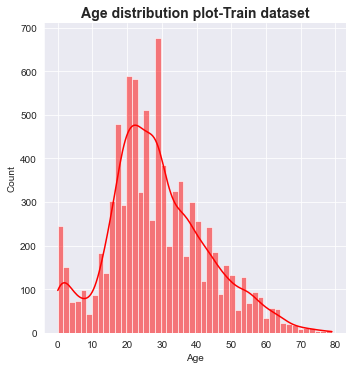

In [4334]:
plt.figure(figsize=(20,6));
sns.displot(x=train['Age'],kde=True,color='red');
plt.title('Age distribution plot-Train dataset',fontweight='bold',fontsize=14);

## Age distribution using boxplot.  The maximum age is 79, although an outlier. The minimum age is 0. To the left of the chart, there are outliers

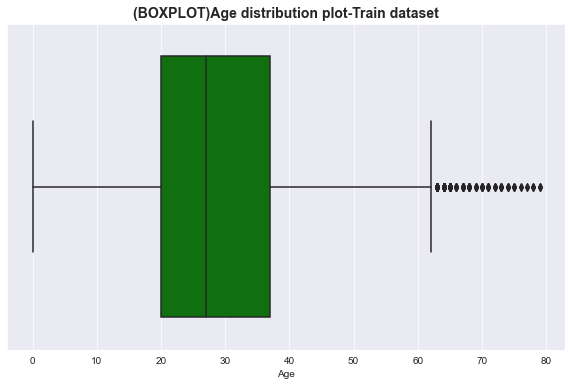

In [4335]:
plt.figure(figsize=(10,6))
sns.boxplot(x=train['Age'],color='green');
plt.title('(BOXPLOT)Age distribution plot-Train dataset',fontweight='bold',fontsize=14);

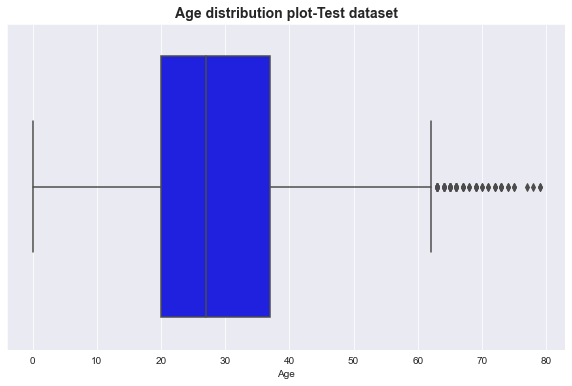

In [4336]:
plt.figure(figsize=(10,6))
sns.boxplot(x=test['Age'],color='blue');
plt.title('Age distribution plot-Test dataset',fontweight='bold',fontsize=14);

<Figure size 720x432 with 0 Axes>

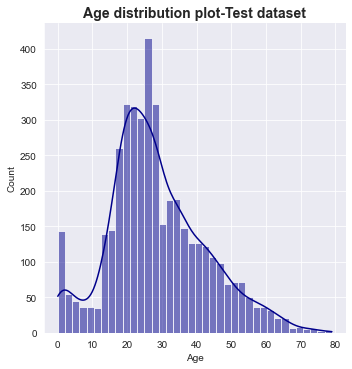

In [4337]:
plt.figure(figsize=(10,6))
sns.displot(x=test['Age'],kde=True,color='darkblue');
plt.title('Age distribution plot-Test dataset',fontweight='bold',fontsize=14);

**Cryosleep ? Cryosleep(Cryogenic sleep) is deep sleep in which body is stored at a very cold temperature to preserve it. The kind of sleep with the hope to wake up in the future.**

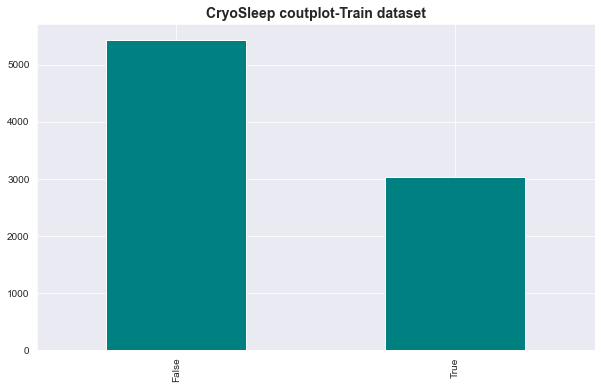

In [4338]:
plt.figure(figsize=(10,6))
train['CryoSleep'].value_counts().plot(kind='bar',color='teal')
plt.title('CryoSleep coutplot-Train dataset',fontweight='bold',fontsize=14);

**Many of the travellers are not in cryogenic sleep maybe due to it cost.**

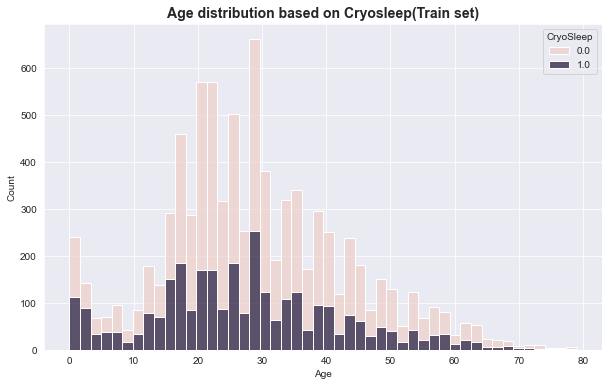

In [4339]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['Age'],hue=train['CryoSleep'],multiple='stack');
plt.title('Age distribution based on Cryosleep(Train set)',fontweight='bold',fontsize=14);

**The above chart shows age distribution based on whether people in the age group are in cryogenic sleep or not. As it is displayed on the histogram above, more people across all age group are not in cryogenic sleep. 0-FALSE,1-TRUE.**

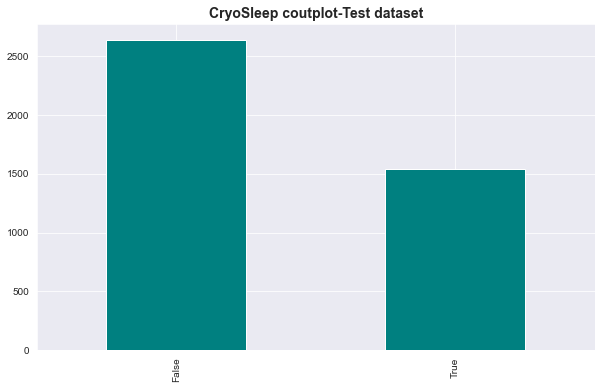

In [4340]:
plt.figure(figsize=(10,6))
test['CryoSleep'].value_counts().plot(kind='bar',color='teal')
plt.title('CryoSleep coutplot-Test dataset',fontweight='bold',fontsize=14);

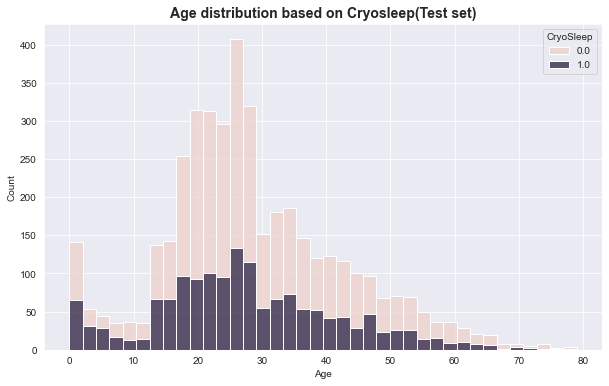

In [4341]:
plt.figure(figsize=(10,6))
sns.histplot(x=test['Age'],hue=test['CryoSleep'],multiple='stack');
plt.title('Age distribution based on Cryosleep(Test set)',fontweight='bold',fontsize=14);

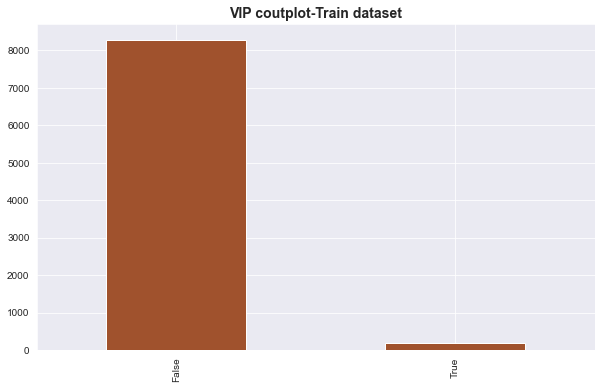

In [4342]:
plt.figure(figsize=(10,6))
train['VIP'].value_counts().plot(kind='bar',color='sienna');
plt.title('VIP coutplot-Train dataset',fontweight='bold',fontsize=14);

**Following the chart above, only few people could afford VIP section.**

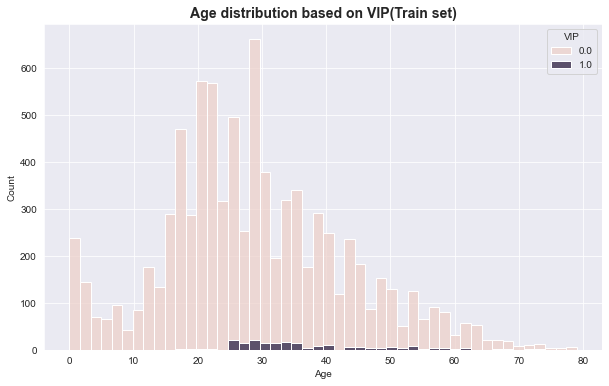

In [4343]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['Age'],hue=train['VIP'],multiple='stack');
plt.title('Age distribution based on VIP(Train set)',fontweight='bold',fontsize=14);

**The distribution chart above confirms that few people could afford the VIP sections**

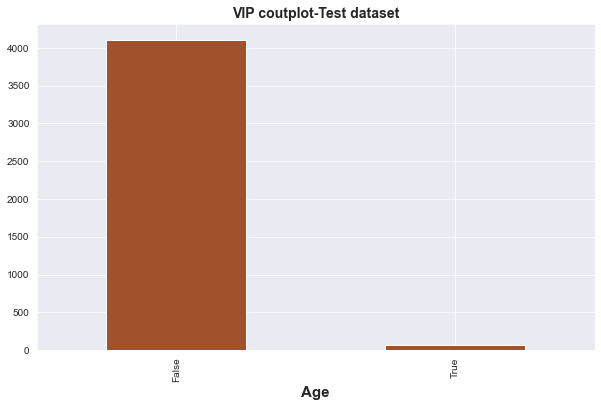

In [4344]:
plt.figure(figsize=(10,6))
test['VIP'].value_counts().plot(kind='bar',color='sienna')
plt.xlabel('Age',fontsize=15,fontweight='bold')
plt.title('VIP coutplot-Test dataset',fontweight='bold',fontsize=14);

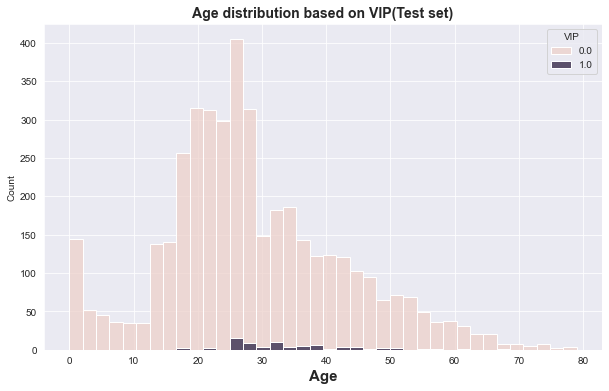

In [4345]:
plt.figure(figsize=(10,6))
sns.histplot(x=test['Age'],hue=test['VIP'],multiple='stack');
plt.xlabel('Age',fontsize=15,fontweight='bold')
plt.title('Age distribution based on VIP(Test set)',fontweight='bold',fontsize=14);

In [4346]:
train.drop(columns=['Name','PassengerId'],axis=1,inplace=True) # Dropped both the name and the passenger ID on train set

In [4347]:
passenger = test['PassengerId'] #Assigned test[passenger] to avariable name

In [4348]:
test.drop(columns=['Name','PassengerId'],axis=1,inplace=True) # dropped both the name and passenger ID colums on test set

## Splitting the Cabin column into: Deck, Number and Side.

In [4349]:
train[['Cabin_deck','Cabin_no','Cabin_side']] = train['Cabin'].str.split('/',expand=True)

In [4350]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_no,Cabin_side
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [4351]:
test[['Cabin_deck','Cabin_no','Cabin_side']] = test['Cabin'].str.split('/',expand=True)

In [4352]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_no,Cabin_side
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S


## Feature Engineering. 
**Total expenses , a new column created to know the total cost each person spent on luxuries**
**In addition, it is known that people who are in cryogenic sleep didn't spend on luxuries**

In [4353]:
train['Total_expenses'] = train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [4354]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_no,Cabin_side,Total_expenses
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P,0.0
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S,736.0
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S,10383.0
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S,5176.0
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S,1091.0


In [4355]:
test['Total_expenses'] = test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [4356]:
test.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_no,Cabin_side,Total_expenses
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,3,S,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,4,S,2832.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,0,S,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,C,1,S,7418.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,F,5,S,645.0


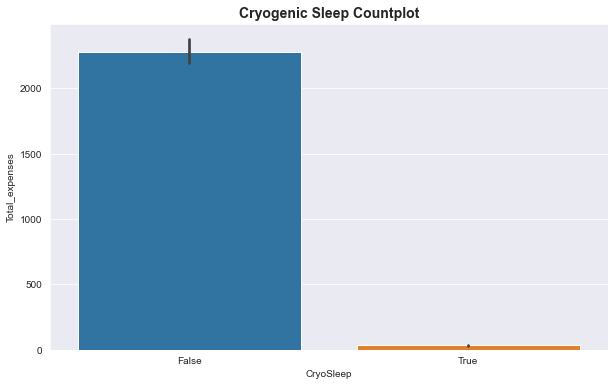

In [4357]:
plt.figure(figsize=(10,6))
sns.barplot(x=train['CryoSleep'],y=train['Total_expenses']);
plt.title('Cryogenic Sleep Countplot',fontsize=14,fontweight='bold');

**People that are not in cryogenic sleep spent more on luxuries as it is seen on the above barplot**

In [4358]:
test['Total_expenses'] = test['Total_expenses'].fillna(test['Total_expenses'].mean())

In [4359]:
train['Total_expenses'] = train['Total_expenses'].fillna(train['Total_expenses'].mean())

## Filling the missing items in the categorical columns with their modes.

In [4360]:
train['CryoSleep'].fillna(train['CryoSleep'].mode(),inplace=True)
test['CryoSleep'].fillna(test['CryoSleep'].mode(),inplace=True)

In [4361]:
train['HomePlanet'].fillna(train['HomePlanet'].mode(),inplace=True)
test['HomePlanet'].fillna(test['HomePlanet'].mode(),inplace=True)

In [4362]:
train['VIP'].fillna(train['VIP'].mode(),inplace=True)
test['VIP'].fillna(test['VIP'].mode(),inplace=True)

In [4363]:
train['Destination'].fillna(train['Destination'].mode(),inplace=True)
test['Destination'].fillna(test['Destination'].mode(),inplace=True)

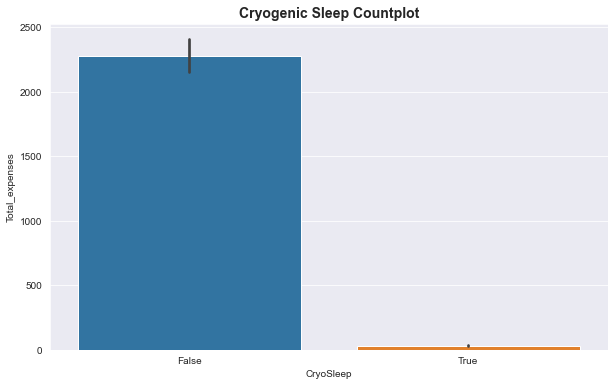

In [4364]:
plt.figure(figsize=(10,6))
sns.barplot(x=test['CryoSleep'],y=test['Total_expenses']);
plt.title('Cryogenic Sleep Countplot',fontsize=14,fontweight='bold');

True     4378
False    4315
Name: Transported, dtype: int64

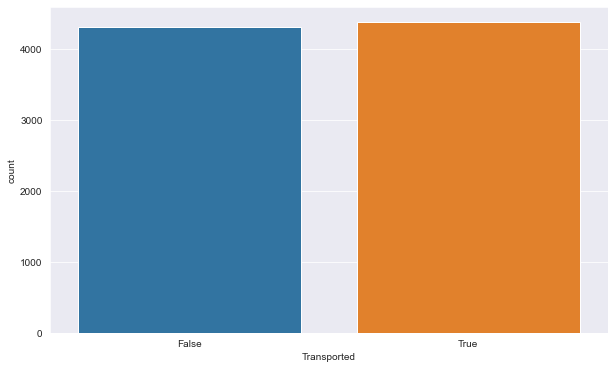

In [4365]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['Transported']);

train['Transported'].value_counts()

**The number of transported passengers and people that are not transported are nearly balanced.It is confirmed by the plot above.** 

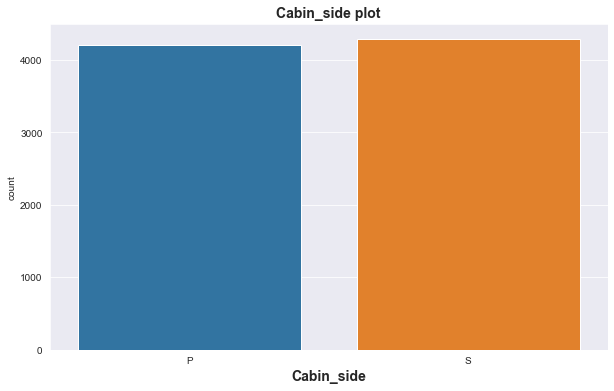

In [4366]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['Cabin_side']);
plt.xlabel('Cabin_side',fontweight='bold',fontsize=14);
plt.title('Cabin_side plot',fontweight='bold',fontsize=14);


**P-Port side , S-Starboard side. There are almost the same number of people on both sides.**

Text(0.5, 1.0, 'Cabin_deck')

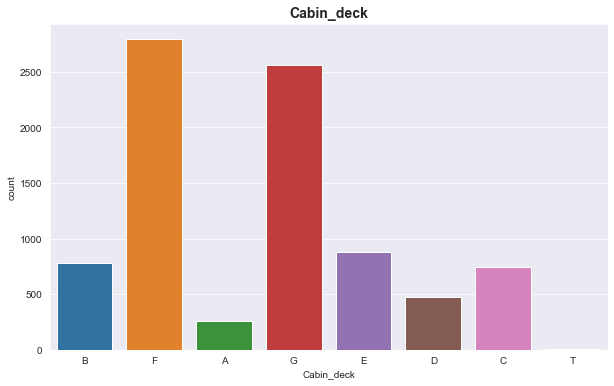

In [4367]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['Cabin_deck']);
plt.title('Cabin_deck',fontsize=14,fontweight='bold')

In [4368]:
train.drop(columns=['Cabin_no','Cabin_side','Cabin_deck','Cabin'],inplace=True)
test.drop(columns=['Cabin_no','Cabin_side','Cabin_deck','Cabin'],inplace=True)

The percentage of transported people is: True     50.362361
False    49.637639
Name: Transported, dtype: float64


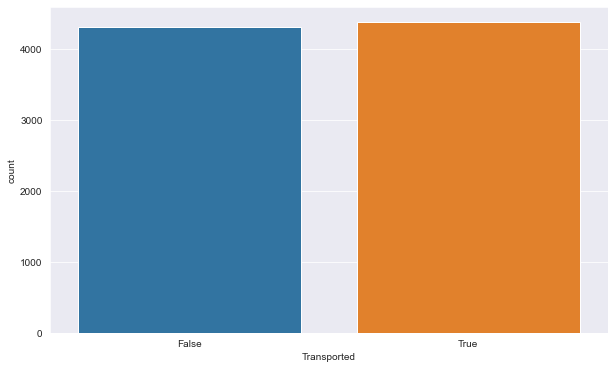

In [4369]:
plt.figure(figsize=(10,6))
sns.countplot(x=train['Transported']);

print('The percentage of transported people is:',train['Transported'].value_counts(normalize=True)*100)

**Transported : Not transported, is nearly 50:50**

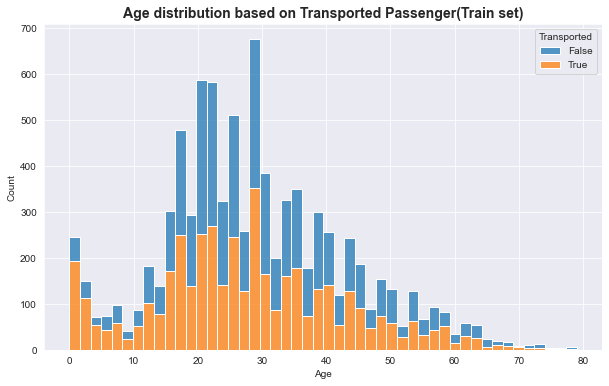

In [4370]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['Age'],hue=train['Transported'],multiple='stack');
plt.title('Age distribution based on Transported Passenger(Train set)',fontweight='bold',fontsize=14);

**Above shows that passengers of younger age were transported more than older passengers**

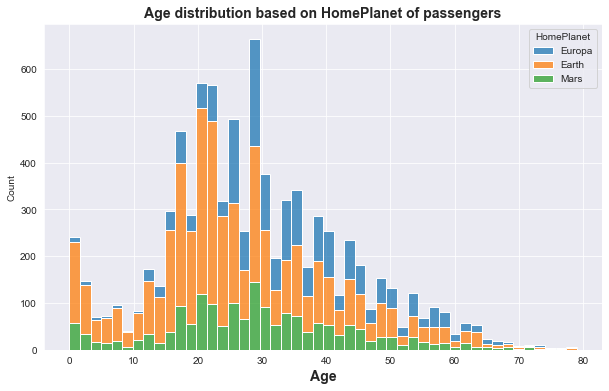

In [4371]:
plt.figure(figsize=(10,6))
sns.histplot(x=train['Age'],hue=train['HomePlanet'],multiple='stack');
plt.xlabel('Age',fontweight='bold',fontsize=14)
plt.title('Age distribution based on HomePlanet of passengers',fontsize=14,fontweight='bold');

**Above shows many passengers across all age groups were from planet Earth** 

Text(0.5, 1.0, 'Age distribution based on HomePlanet of passengers')

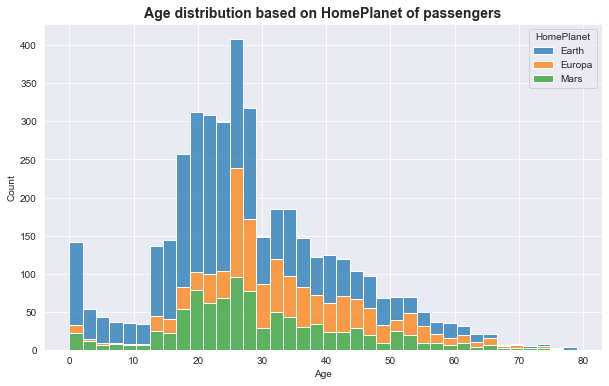

In [4372]:
plt.figure(figsize=(10,6))
sns.histplot(x=test['Age'],hue=test['HomePlanet'],multiple='stack');
plt.title('Age distribution based on HomePlanet of passengers',fontsize=14,fontweight='bold')

## Encoding of categorical columns.

In [4373]:
encoder = LabelEncoder()

In [4374]:
train['Destination']= encoder.fit_transform(train['Destination'])
train['Destination']

0       2
1       2
2       2
3       2
4       2
       ..
8688    0
8689    1
8690    2
8691    0
8692    2
Name: Destination, Length: 8693, dtype: int32

In [4375]:
test['Destination']= encoder.fit_transform(test['Destination'])
test['Destination']

0       2
1       2
2       0
3       2
4       2
       ..
4272    2
4273    2
4274    0
4275    3
4276    1
Name: Destination, Length: 4277, dtype: int32

In [4376]:
train['CryoSleep']= encoder.fit_transform(train['CryoSleep'])
train['CryoSleep']

0       0
1       0
2       0
3       0
4       0
       ..
8688    0
8689    1
8690    0
8691    0
8692    0
Name: CryoSleep, Length: 8693, dtype: int32

In [4377]:
test['CryoSleep'] = encoder.fit_transform(test['CryoSleep'])
test['CryoSleep']

0       1
1       0
2       1
3       0
4       0
       ..
4272    1
4273    0
4274    1
4275    0
4276    1
Name: CryoSleep, Length: 4277, dtype: int32

In [4378]:
train['VIP'] = encoder.fit_transform(train['VIP'])
train['VIP']

0       0
1       0
2       1
3       0
4       0
       ..
8688    1
8689    0
8690    0
8691    0
8692    0
Name: VIP, Length: 8693, dtype: int32

In [4379]:
test['VIP'] = encoder.fit_transform(test['VIP'])
test['VIP']

0       0
1       0
2       0
3       0
4       0
       ..
4272    0
4273    0
4274    0
4275    0
4276    0
Name: VIP, Length: 4277, dtype: int32

In [4380]:
train['HomePlanet'] = encoder.fit_transform(train['HomePlanet'])
train['HomePlanet'].value_counts()

0    4602
1    2131
2    1759
3     201
Name: HomePlanet, dtype: int64

In [4381]:
test['HomePlanet'] = encoder.fit_transform(test['HomePlanet'])
test['HomePlanet'].value_counts()

0    2263
1    1002
2     925
3      87
Name: HomePlanet, dtype: int64

In [4382]:
mask = np.zeros_like(train.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

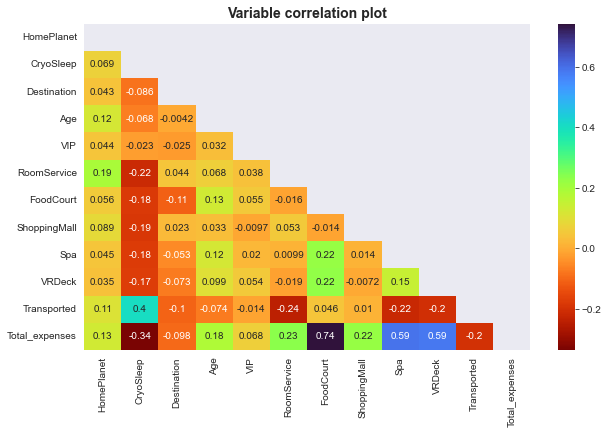

In [4383]:
plt.figure(figsize=(10,6))
sns.heatmap(train.corr(),annot=True,
            cmap='turbo_r',linecolor='red',mask=mask, annot_kws= {'size':10});
plt.title('Variable correlation plot',fontsize=14,fontweight='bold');

In [4419]:
train.corr() # Correlation table for the train dataset

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_expenses
HomePlanet,1.000000,0.068726,0.042618,0.123121,0.044255,0.192227,0.056231,0.088919,0.045081,0.035042,0.107755,0.128579
CryoSleep,0.068726,1.000000,-0.085571,-0.068486,-0.023407,-0.216965,-0.182004,-0.186919,-0.178408,-0.171798,0.404716,-0.335848
Destination,0.042618,-0.085571,1.000000,-0.004207,-0.024905,0.044335,-0.109466,0.022679,-0.053044,-0.072864,-0.104817,-0.097849
Age,0.123121,-0.068486,-0.004207,1.000000,0.032463,0.067612,0.127937,0.032655,0.120992,0.099210,-0.074249,0.184509
VIP,0.044255,-0.023407,-0.024905,0.032463,1.000000,0.037986,0.054927,-0.009654,0.019728,0.054009,-0.014260,0.067954
RoomService,0.192227,-0.216965,0.044335,0.067612,0.037986,1.000000,-0.015521,0.052962,0.009925,-0.019207,-0.242048,0.234303
FoodCourt,0.056231,-0.182004,-0.109466,0.127937,0.054927,-0.015521,1.000000,-0.013934,0.220587,0.224275,0.046074,0.742208
ShoppingMall,0.088919,-0.186919,0.022679,0.032655,-0.009654,0.052962,-0.013934,1.000000,0.013678,-0.007189,0.010019,0.220498
Spa,0.045081,-0.178408,-0.053044,0.120992,0.019728,0.009925,0.220587,0.013678,1.000000,0.147957,-0.218791,0.592439
VRDeck,0.035042,-0.171798,-0.072864,0.099210,0.054009,-0.019207,0.224275,-0.007189,0.147957,1.000000,-0.204825,0.585835


In [4420]:
test.corr() # Correlation table for the test dataset

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_expenses
HomePlanet,1.000000,0.077740,0.021063,0.146334,0.040584,0.209563,0.047941,0.129227,0.046555,0.039603,0.131522
CryoSleep,0.077740,1.000000,-0.091084,-0.033102,-0.036176,-0.238961,-0.199711,-0.213817,-0.171035,-0.169332,-0.341524
Destination,0.021063,-0.091084,1.000000,-0.019536,-0.011364,0.038740,-0.099387,0.029408,-0.090729,-0.067590,-0.104432
Age,0.146334,-0.033102,-0.019536,1.000000,0.049644,0.062676,0.106394,0.037652,0.105307,0.101535,0.163660
VIP,0.040584,-0.036176,-0.011364,0.049644,1.000000,0.007351,0.084910,0.016394,0.097784,0.058566,0.114343
RoomService,0.209563,-0.238961,0.038740,0.062676,0.007351,1.000000,-0.029727,0.062634,0.006245,-0.032282,0.198231
FoodCourt,0.047941,-0.199711,-0.099387,0.106394,0.084910,-0.029727,1.000000,0.027165,0.237436,0.275247,0.748768
ShoppingMall,0.129227,-0.213817,0.029408,0.037652,0.016394,0.062634,0.027165,1.000000,0.003083,0.027435,0.238097
Spa,0.046555,-0.171035,-0.090729,0.105307,0.097784,0.006245,0.237436,0.003083,1.000000,0.140948,0.583156
VRDeck,0.039603,-0.169332,-0.067590,0.101535,0.058566,-0.032282,0.275247,0.027435,0.140948,1.000000,0.640071


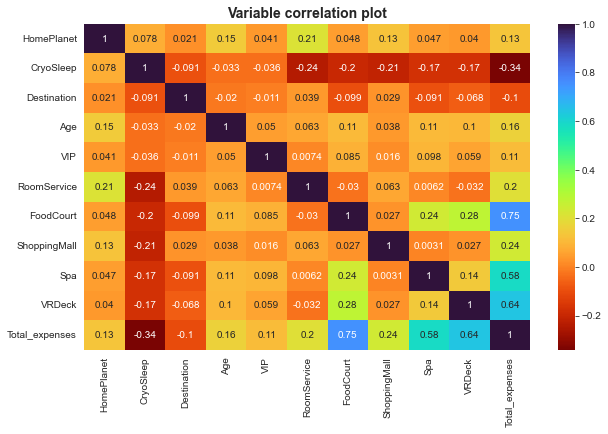

In [4457]:
plt.figure(figsize=(10,6))
sns.heatmap(test.corr(),annot=True,
            cmap='turbo_r',linecolor='red'annot_kws= {'size':10});
plt.title('Variable correlation plot',fontsize=14,fontweight='bold');

## Machine Learning Modelling

In [4421]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [4422]:
y = train['Transported'].values
X = train.drop(columns=['Transported']).values

In [4423]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Standard Scaling
**Making all features to be in the same range using the standard scaler.**

In [4425]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  =  sc.fit_transform(X_test)

## Logistic Regression Model

In [4430]:
model = LogisticRegression() # Calling the object of a class

In [4431]:
model.fit(X_train,y_train) #fitting the model

LogisticRegression()

In [4432]:
y_pred = model.predict(X_test)
pd.Series(y_pred).value_counts() 

True     938
False    801
dtype: int64

In [4433]:
y_pred_train = model.predict(X_train)
y_pred_series = pd.Series(y_pred_train)
y_pred_series.value_counts()

True     3838
False    3116
dtype: int64

In [4394]:
accuracy_score(y_train,model.predict(X_train))

0.7831463905665804

**On the train dataset, 78.3% of the prediction is predicted by the features** 

In [4395]:
accuracy_score(y_test,model.predict(X_test))

0.7699827487061529

**On the test dataset, 76.9% of the prediction is predicted by the features** 

## Model evaluation metrics
**Confusion Matrix**

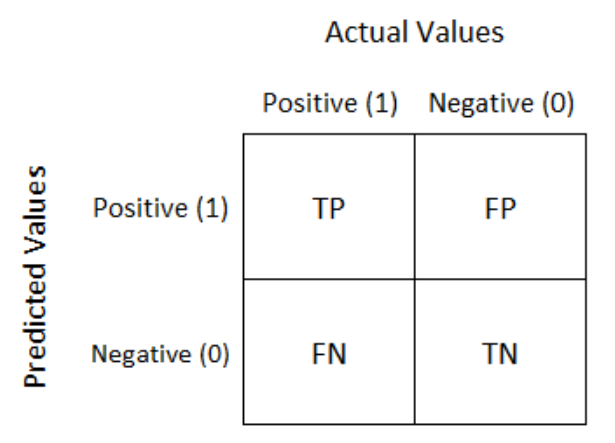

**True Positive: We predicted positive and it’s true.**

**True Negative: We predicted negative and it’s true.**

**False Positive (Type 1 Error)- We predicted positive and it’s false.**

**False Negative (Type 2 Error)- We predicted negative and it’s false.**

In [4396]:
train_matrix= confusion_matrix(y_train,model.predict(X_train))
train_matrix

array([[2520,  912],
       [ 596, 2926]], dtype=int64)

In [4397]:
test_matrix= confusion_matrix(y_test,model.predict(X_test))
test_matrix

array([[642, 241],
       [159, 697]], dtype=int64)

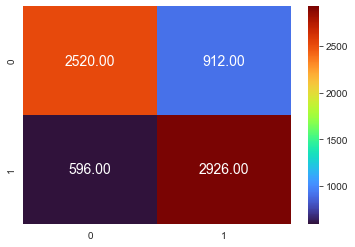

In [4398]:
sns.heatmap(train_matrix,annot=True,
            cmap='turbo',linecolor='red',annot_kws= {'size':14},fmt='.2f');

**On the train dataset, there are 5446 correct predictions and 1508 incorrect predictions as predicted by our logistic regression model.**

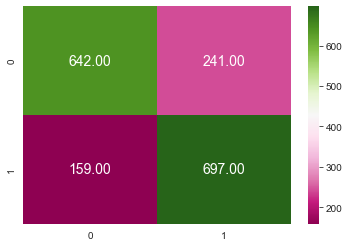

In [4399]:
sns.heatmap(test_matrix,annot=True,
            cmap='PiYG',linecolor='red',annot_kws= {'size':14},fmt='.2f');

**On the test dataset, there are 1339 correct predictions and 400 incorrect predictions as predicted by our logistic regression model.**

## Random Forest Classifier Model

In [4400]:
from sklearn.ensemble import RandomForestClassifier

In [4401]:
rand = RandomForestClassifier()
rand

RandomForestClassifier()

In [4402]:
rand.fit(X_train,y_train)

RandomForestClassifier()

In [4403]:
y_pred_train = rand.predict(X_train)
y_pred_series = pd.Series(y_pred_train)
y_pred_series.value_counts()

True     3733
False    3221
dtype: int64

In [4404]:
y_pred = rand.predict(X_test)
pd.Series(y_pred).value_counts()

False    951
True     788
dtype: int64

In [4405]:
accuracy_score(y_train,rand.predict(X_train))

0.9446361806154732

**On the train dataset, 94.4% of the prediction is predicted by the features**

In [4406]:
accuracy_score(y_test,rand.predict(X_test))

0.7814836112708453

**On the test dataset, 78.14% of the prediction is predicted by the features**

In [4407]:
train_mat= confusion_matrix(y_train,rand.predict(X_train))
train_mat

array([[3134,  298],
       [  87, 3435]], dtype=int64)

In [4408]:
test_mat= confusion_matrix(y_test,rand.predict(X_test))
test_mat

array([[727, 156],
       [224, 632]], dtype=int64)

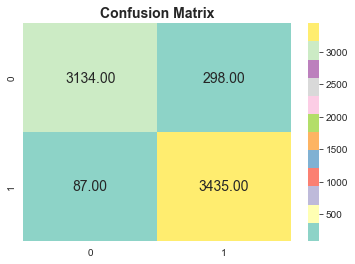

In [4487]:
sns.heatmap(train_mat,annot=True,
            cmap='Set3',linecolor='red',annot_kws= {'size':14},fmt='.2f');
plt.title('Confusion Matrix',fontweight='bold',fontsize=14);

**On the train dataset, there are 6569 correct predictions and 385 incorrect predictions as predicted by our random forest classifier model.**

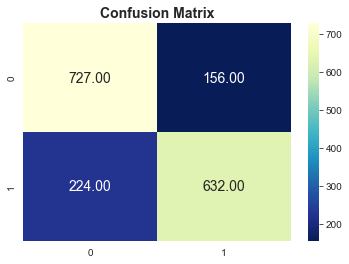

In [4436]:
sns.heatmap(test_mat,annot=True,
            cmap='YlGnBu_r',linecolor='red',annot_kws= {'size':14},fmt='.2f');
plt.title('Confusion Matrix',fontweight='bold',fontsize=14);

**On the test dataset, there are 1359 correct predictions and 380 incorrect predictions as predicted by our random forest classifier model.**

In [4411]:
from sklearn.metrics import classification_report

In [4412]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

       False       0.80      0.73      0.76       883
        True       0.74      0.81      0.78       856

    accuracy                           0.77      1739
   macro avg       0.77      0.77      0.77      1739
weighted avg       0.77      0.77      0.77      1739



In [4413]:
print(classification_report(y_test,rand.predict(X_test)))

              precision    recall  f1-score   support

       False       0.76      0.82      0.79       883
        True       0.80      0.74      0.77       856

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



## Decision Tree Classifier

In [4460]:
from sklearn.tree import DecisionTreeClassifier

In [4467]:
tree = DecisionTreeClassifier()
tree

DecisionTreeClassifier()

In [4468]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [4469]:
tree_train = tree.predict(X_train)
tree_series = pd.Series(tree_train)
tree_series.value_counts()

True     3666
False    3288
dtype: int64

In [4470]:
y_pred_tree = tree.predict(X_test)
pd.Series(y_pred_tree).value_counts()

True     935
False    804
dtype: int64

In [4471]:
accuracy_score(y_train,tree.predict(X_train))

0.9447799827437446

In [4477]:
accuracy_score(y_test,tree.predict(X_test))

0.7176538240368028

In [4478]:
print(classification_report(y_test,tree.predict(X_test)))

              precision    recall  f1-score   support

       False       0.74      0.68      0.71       883
        True       0.70      0.76      0.73       856

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739



In [4479]:
tree_matrix= confusion_matrix(y_train,tree.predict(X_train))
tree_matrix

array([[3168,  264],
       [ 120, 3402]], dtype=int64)

In [4480]:
tree_test_matrix= confusion_matrix(y_test,tree.predict(X_test))
tree_test_matrix

array([[598, 285],
       [206, 650]], dtype=int64)

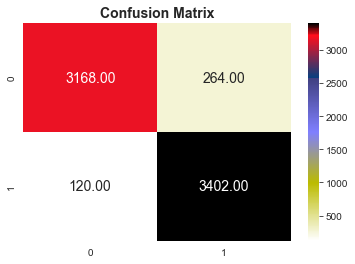

In [4482]:
sns.heatmap(tree_matrix,annot=True,
            cmap='gist_stern_r',linecolor='red',annot_kws= {'size':14},fmt='.2f');
plt.title('Confusion Matrix',fontweight='bold',fontsize=14);

**On the train dataset, there are 6570 correct predictions and 384 incorrect predictions as predicted by our decision tree classifier model.**

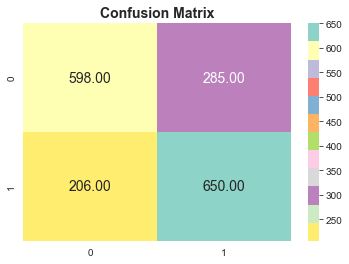

In [4485]:
sns.heatmap(tree_test_matrix,annot=True,
            cmap='Set3_r',linecolor='red',annot_kws= {'size':14},fmt='.2f');
plt.title('Confusion Matrix',fontweight='bold',fontsize=14);

## Features Importance 1

**On the test dataset, there are 1248 correct predictions and 491 incorrect predictions as predicted by our random forest classifier model.**

In [4465]:
new_df = pd.DataFrame({'Features':test.columns,'Importances':rand.feature_importances_}).sort_values(by=['Importances'],ascending=False)
new_df

,Features,Importances
10,Total_expenses,0.188698
3,Age,0.152613
5,RoomService,0.105401
8,Spa,0.105389
6,FoodCourt,0.098240
9,VRDeck,0.093242
1,CryoSleep,0.085651
7,ShoppingMall,0.078751
0,HomePlanet,0.056507
2,Destination,0.028680


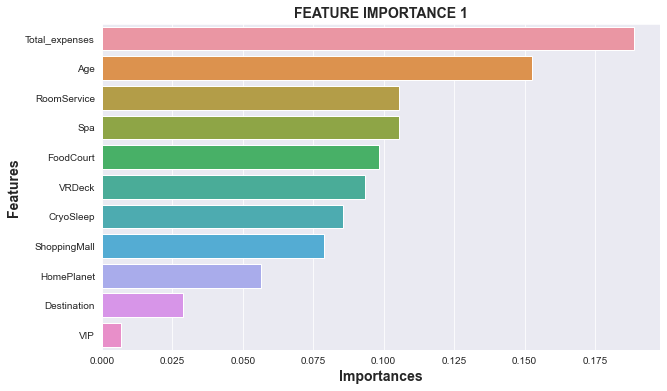

In [4476]:
plt.figure(figsize=(10,6))
sns.barplot(x=new_df['Importances'],y=new_df['Features']);
plt.ylabel('Features',fontweight='bold',fontsize=14)
plt.xlabel('Importances',fontweight='bold',fontsize=14)
plt.title('FEATURE IMPORTANCE 1',fontweight='bold',fontsize=14);

**Above chart shows that Total Expenses column contributed more to the result of the random forest classifier model.. Has an importance of 0.188698 on the dataframe above the chart**

In [4473]:
new_df1 = pd.DataFrame({'Features':test.columns,'Importances':tree.feature_importances_}).sort_values(by=['Importances'],ascending=False)
new_df1

,Features,Importances
10,Total_expenses,0.351478
3,Age,0.116433
6,FoodCourt,0.105817
7,ShoppingMall,0.099878
8,Spa,0.084867
9,VRDeck,0.067792
5,RoomService,0.066487
0,HomePlanet,0.060322
2,Destination,0.024065
1,CryoSleep,0.013900


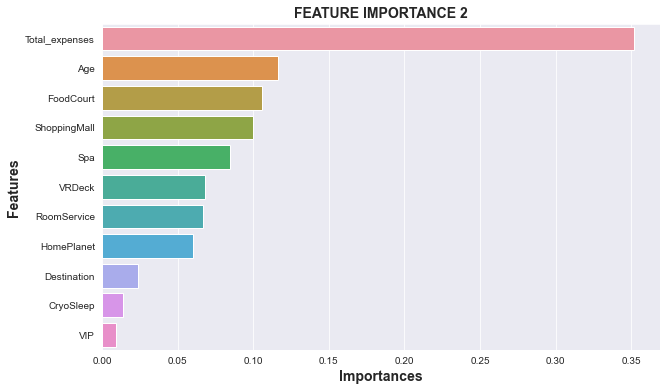

In [4475]:
plt.figure(figsize=(10,6))
sns.barplot(x=new_df1['Importances'],y=new_df1['Features']);
plt.ylabel('Features',fontweight='bold',fontsize=14)
plt.xlabel('Importances',fontweight='bold',fontsize=14)
plt.title('FEATURE IMPORTANCE 2',fontweight='bold',fontsize=14);

**Above chart shows that Total Expenses column contributed more to the result of the decision tree classifier model.. Has an importance of 0.351 on the dataframe above the chart**

## Logistic Regression Predictions

In [4416]:
test_pred = model.predict(test)
test_pred

array([False, False, False, ..., False,  True, False])

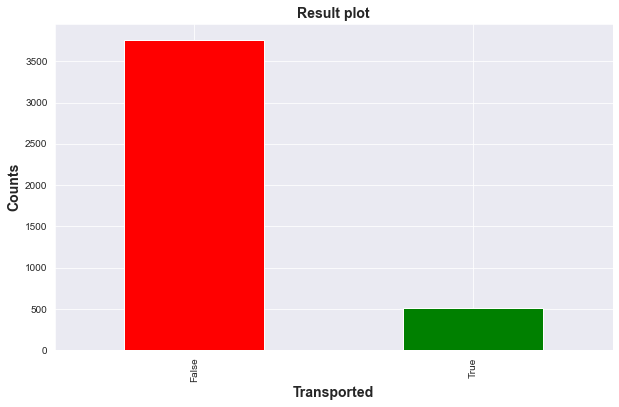

In [4446]:
plt.figure(figsize=(10,6))
pd.Series(test_pred).value_counts().plot(kind='bar',color=['red','green']);
plt.xlabel('Transported',fontweight='bold',fontsize=14)
plt.ylabel('Counts',fontweight='bold',fontsize=14)
plt.title('Result plot',fontweight='bold',fontsize=14);

In [4494]:
result = pd.DataFrame({'ID':passenger,'Transported':test_pred})
result

,ID,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


## Random Forest Predictions

In [4449]:
test_pred_rand = rand.predict(test)
test_pred_rand

array([False, False, False, ..., False, False, False])

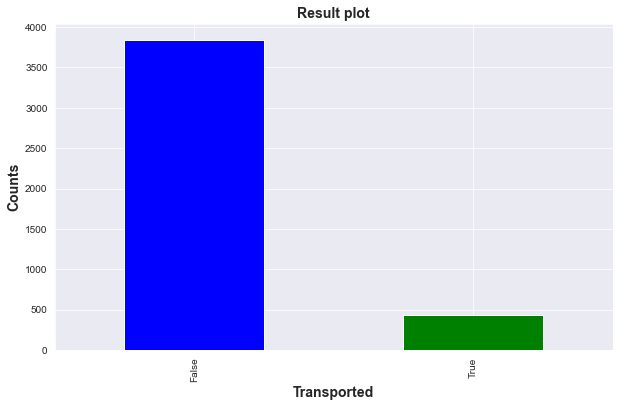

In [4450]:
plt.figure(figsize=(10,6))
pd.Series(test_pred_rand).value_counts().plot(kind='bar',color=['blue','green']);
plt.xlabel('Transported',fontweight='bold',fontsize=14)
plt.ylabel('Counts',fontweight='bold',fontsize=14)
plt.title('Result plot',fontweight='bold',fontsize=14);

In [4495]:
result1 = pd.DataFrame({'ID':passenger,'Transported':test_pred_rand})
result1

,ID,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


## Decision Tree Predictions

In [4489]:
test_pred_tree = tree.predict(test)
test_pred_tree

array([ True, False,  True, ...,  True, False,  True])

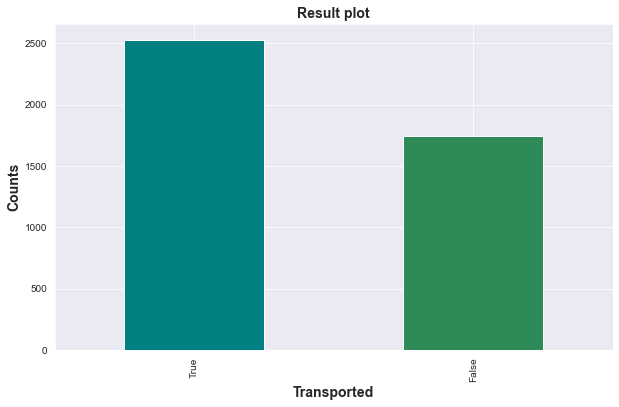

In [4491]:
plt.figure(figsize=(10,6))
pd.Series(test_pred_tree).value_counts().plot(kind='bar',color=['teal','seagreen']);
plt.xlabel('Transported',fontweight='bold',fontsize=14)
plt.ylabel('Counts',fontweight='bold',fontsize=14)
plt.title('Result plot',fontweight='bold',fontsize=14);

In [4493]:
result2 = pd.DataFrame({'ID':passenger,'Transported':test_pred_tree})
result2

,ID,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


## Classification reports parameters

**The important classification parameters are : (1)Precision (2) Recall (3) F1 score**
**Precision: % of correct positive predictions relative to total positive predictions.**
**Recall: % of correct positive predictions relative to total actual positives**
**F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.**
##### Logistic Regression Classification report.
**Precision: For both true and false , precision = 0.74,0.80 respectively. This is telling us that out all passengers, that the model predicted that was tranported(True), only 74% actually did and 80% didn't actually.**
**Recall: Out of all the passengers that was transported, the model predicted correctly for 81% of the passengers**
**F1 Score: The F1 score is close to 1, which is a good one for our classification model**

##### Random Forest Classification report.
**Precision: For both true and false , precision = 0.80,0.76 respectively. This is telling us that out all passengers, that the model predicted that was tranported(True), only 76% actually did and 80% didn't actually.**
**Recall: Out of all the passengers that was transported, the model predicted correctly for 74% of the passengers**
**F1 Score: The F1 score is close to 1, which is a good one for our classification model**

##### Decision Tree Classification report.
**Precision: For both true and false , precision = 0.70,0.74 respectively. This is telling us that out all passengers, that the model predicted that was tranported(True), only 70% actually did and 74% didn't actually.**
**Recall: Out of all the passengers that was transported, the model predicted correctly for 76% of the passengers**
**F1 Score: The F1 score is close to 1, which is a good one for our classification model**

## Model Selection
**The three models used are : Logistic Regression , Random Forest Classifier and Decision Tree Classier. However, out of the three models,Random Forest Classifier performed better with an accuracy score of 94% and 78% respectively . My my model of choice is the Random Forest Classifier, because random forest classifier is flexible and of high accuracy. Also, it takes care of overfitting as it does not exist in the case of random forest. It provides a medium of selecting the best features using the feature_importabces_ attributes.**

# Conclusion

**(1)Two of the algorithms used predicted that many of the passenger were not transported, but but on few were transported as it is shown on the value count plots of the two models. However, decision tree classifier showed otherwise** 
**(2)The new column that was created named "Total Expenses" contributed more to the random forest classifier model because it has the highest importance**
**(3)It is also observed that majority of the passenger lived on Earth in comparison to Europa and Mars**
**(4)People that were in cryogenic sleep were transported more, the correlation(0.40) between two variables is postive meaning they move in the same direction**
**(5)However, people in cryogenic sleep did'nt spend on luxuries. The correction(-0.335) between CryoSleep and Transported is negative, meaning they move in an opposite direction**
**(6)Room Service contributed more to the expenses of people's total expenses, a correlation of 0.74 exists between them**

## Thank You !!!